In [1]:
#installation de la bibliothéque rdflib 
!pip install rdflib

     |████████████████████████████████| 235kB 5.1MB/s 
     |████████████████████████████████| 51kB 4.4MB/s 


In [2]:
import rdflib

# Création de notre graphe(season&humidité)
g = rdflib.Graph()

# analyser dans un fichier RDF hébergé sur Internet
result = g.parse("https://dbpedia.org/ontology/age")

# boucle sur chaque triple du graphique (subj, pred, obj)
for subj, pred, obj in g:
    # vérifier s'il y a au moins un triple dans le graphique
    if (subj, pred, obj) not in g:
       raise Exception("It better be!")

# imprimer le nombre de "triples" dans le graphique
print("graph has {} statements.".format(len(g)))


# imprimer l'intégralité du graphique au format RDF Turtle 
print(g.serialize(format="turtle").decode("utf-8"))
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import FOAF , XSD
g = Graph()
age = URIRef("https://dbpedia.org/ontology/age")

graph has 15 statements.
@prefix ns4: <http://open.vocab.org/terms/> .
@prefix owl: <http://www.w3.org/2002/07/owl#> .
@prefix prov: <http://www.w3.org/ns/prov#> .
@prefix rdf: <http://www.w3.org/1999/02/22-rdf-syntax-ns#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix wdrs: <http://www.w3.org/2007/05/powder-s#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dbpedia.org/ontology/> ns4:defines <http://dbpedia.org/ontology/age> .

<http://dbpedia.org/ontology/data/definitions.ttl> ns4:describes <http://dbpedia.org/ontology/age> .

<http://dbpedia.org/ontology/age> a rdf:Property,
        owl:DatatypeProperty ;
    rdfs:label "Alter"@de,
        "ηλικία"@el,
        "age"@en,
        "leeftijd"@nl,
        "старост"@sr ;
    rdfs:domain <http://dbpedia.org/ontology/Agent> ;
    rdfs:isDefinedBy <http://dbpedia.org/ontology/> ;
    rdfs:range xsd:integer ;
    owl:sameAs <http://dbpedia.org/ontology/age> ;
    wdrs:describedby <http://dbpedia.org/ontology/

In [13]:

import rdflib
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
import networkx as nx
import matplotlib.pyplot as plt
from rdflib import Graph, Literal, RDF, URIRef,DCTERMS
from rdflib.namespace import FOAF , XSD

# Ajouter des triplets à l'aide de la méthode add() de store.
g = Graph()
age = URIRef("https://dbpedia.org/ontology/age")

g.add((age,  DCTERMS['Devided'], Literal("age[41,45]")))
g.add((age,  DCTERMS['Devided'], Literal("age[45,50]")))
g.add((age,  DCTERMS['Devided'], Literal("age[51,55]")))
g.add((age,  DCTERMS['Devided'], Literal("age[56,60]")))
g.add((age,  DCTERMS['Devided'], Literal("age[61,65]")))



In [14]:
print(g)

[a rdfg:Graph;rdflib:storage [a rdflib:Store;rdfs:label 'IOMemory']].


In [15]:
print("--- Mon triplet est composé de : ---")
for s, p, o in g:
    print((s, p, o))
#Voir mon graphe RDF qui est composé en un seul triplet sous format turtle 
print(g.serialize(format='n3').decode("utf-8"))

--- Mon triplet est composé de : ---
(rdflib.term.URIRef('https://dbpedia.org/ontology/age'), rdflib.term.URIRef('http://purl.org/dc/terms/Devided'), rdflib.term.Literal('age[51,55]'))
(rdflib.term.URIRef('https://dbpedia.org/ontology/age'), rdflib.term.URIRef('http://purl.org/dc/terms/Devided'), rdflib.term.Literal('age[45,50]'))
(rdflib.term.URIRef('https://dbpedia.org/ontology/age'), rdflib.term.URIRef('http://purl.org/dc/terms/Devided'), rdflib.term.Literal('age[61,65]'))
(rdflib.term.URIRef('https://dbpedia.org/ontology/age'), rdflib.term.URIRef('http://purl.org/dc/terms/Devided'), rdflib.term.Literal('age[41,45]'))
(rdflib.term.URIRef('https://dbpedia.org/ontology/age'), rdflib.term.URIRef('http://purl.org/dc/terms/Devided'), rdflib.term.Literal('age[56,60]'))
@prefix ns1: <http://purl.org/dc/terms/> .

<https://dbpedia.org/ontology/age> ns1:Devided "age[41,45]",
        "age[45,50]",
        "age[51,55]",
        "age[56,60]",
        "age[61,65]" .




In [16]:
G = rdflib_to_networkx_multidigraph(g)

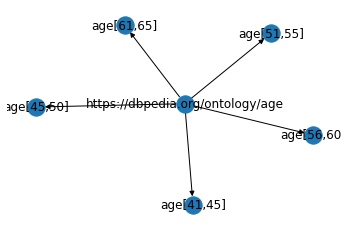

In [17]:
# Plot Networkx instance of RDF Graph
pos = nx.spring_layout(G, scale=10)
edge_labels = nx.get_edge_attributes(G, 'r')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
nx.draw(G, with_labels=True)

#if not in interactive mode for 
plt.show()